## Setup

GRB030401	41

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

datadir='/content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files'
%cd /content/drive/My Drive/vianie_ASTRO361/Notebooks from Lecture

% ls

Mounted at /content/drive
/content/drive/My Drive/vianie_ASTRO361/Notebooks from Lecture
 bias.fits      cal_new.fits                'Image Processing.ipynb'
 cal_123.fits   Celestial_Navigation.ipynb  'Statistics Part 1.ipynb'
 cal.fits       flat.fits                   'Statistics Part 2.ipynb'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
%pip install photutils

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import glob
from skimage import exposure #sci-kit imaging processing library
plt.rcParams['figure.figsize'] = [15, 8]



     |████████████████████████████████| 798kB 8.1MB/s 


In [ ]:
# Import bias files
biasfiles=glob.glob(datadir+'/*BIAS.fits') # for lab you need make a masterbias
biasfiles.sort()
nbias=len(biasfiles)
print("Found %i Files"%nbias)

# Import flat files
flatfiles=glob.glob(datadir+'/*FLATV.fits') # for lab you make a master flat.
flatfiles.sort()
nflat=len(flatfiles)
print("Found %i Files"%nflat)

# Import main data file of GRB
datafile=glob.glob(datadir+'/*0041.grb030329.fits')[0] #make sure filter for flat matches data! V filter

#print(datadir)

Found 10 Files
Found 11 Files


## Load some Frames and inspect

Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0001.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0002.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0003.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0004.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0005.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My Drive/vianie_ASTRO361/Lab 4 GRB Aperture Photometry/GRB DATA/GRB030401_BIAS_VFLAT_Files/0006.BIAS.fits
 w/ SHAPE: (1032, 1040)
Working on file /content/drive/My 

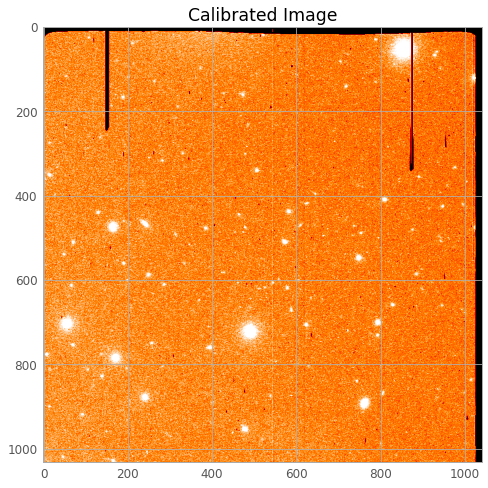

In [ ]:
# Load all bias data into a tuple (list) of arrays
bias_tuple = []
for f in biasfiles:
    data0=fits.getdata(f, ext=0).astype(np.int)
    bias_tuple.append(data0)
    print('Working on file %s' % f)
    print(" w/ SHAPE:",data0.shape)

# Turn this "list" of arrays into a 3-dimensional data cube (dimx,dimy, n_files) for easier analysis.
bias_cube_raw = np.dstack(bias_tuple)
print('Raw Bias Data Cube Shape: ',bias_cube_raw.shape,'\n')

# Create Master Bias
master_bias = np.median(bias_cube_raw,axis=2)

# Load all flat data into a tuple (list) of arrays
flat_tuple = []
for f in flatfiles:
    data01=fits.getdata(f, ext=0).astype(np.int)
    data01 = data01-master_bias
    data01 = data01 / np.median(data01)
    flat_tuple.append(data01)
    print('Working on file %s' % f)
    print(" w/ SHAPE:",data01.shape)

# Turn this "list" of arrays into a 3-dimensional data cube (dimx,dimy, n_files) for easier analysis.
flat_cube = np.dstack(flat_tuple)
print('Raw Flat Data Cube Shape: ',flat_cube.shape,'\n')

# Load all main data 
data02 = fits.getdata(datafile, ext=0, header = False)
print(" w/ SHAPE:",data02.shape)

###############################################################################

# Create Master Flat
master_flat_norm = np.median(flat_cube, axis=2)

master_flat_norm = np.where(master_flat_norm < .5 , 1.0, master_flat_norm) # crazy pixels just set flat=1

# Create calibrated image
cal = (data02 - master_bias) / master_flat_norm
print('\n', cal)

# Display image
plt.imshow(cal,vmin=700, vmax=800)
plt.imshow(exposure.equalize_hist(cal))
plt.title('Calibrated Image')

# Double-checking values
print(np.median(cal))
print(np.median(master_flat_norm))
print(np.median(master_bias), '\n')
print('\n', 'Errors:')
print(np.std(master_flat_norm))

In [ ]:
# Saving flats and calibrated image to drive
fits.writeto('flat.fits',master_flat_norm, overwrite=True)
fits.writeto('bias.fits',master_bias, overwrite=True)
fits.writeto('cal_new.fits', cal, overwrite=True)

In [ ]:
#bias,bias_header = fits.getdata(biasfile, ext=0,header=True)
#flat,flat_header = fits.getdata(flatfile, ext=0,header=True)
#data,data_header = fits.getdata(datafile, ext=0,header=True)

In [ ]:
# plt.subplot(1,3,1)
# plt.imshow(bias)
# plt.title('Bias');
# plt.subplot(1,3,2)
# plt.imshow(flat)
# plt.title('Flat');
# plt.subplot(1,3,3)
# plt.imshow(data)
# plt.title('data');
# plt.show()

In [ ]:

#plt.subplot(1,3,1)
#plt.imshow(exposure.equalize_hist(bias))
#plt.subplot(1,3,2)
#plt.imshow(exposure.equalize_hist(flat))
#plt.subplot(1,3,3)
#plt.imshow(exposure.equalize_hist(data))
#plt.show()

In [ ]:
 #flat_cal = (flat-bias)
 #flat_cal = flat_cal/np.median(flat_cal)
 #flat_cal = np.where(flat_cal < .5 , 1.0, flat_cal) # crazy pixels just set flat=1

#plt.figure(figsize=(15,5))
#plt.subplot(1,3,1)
#plt.imshow(flat_cal)
#plt.subplot(1,3,2)
#plt.imshow(flat_cal,vmin=.95,vmax=1.03)
#plt.subplot(1,3,3)
#plt.hist(flat_cal.flatten(),bins=1000)
#plt.xlim(.9,1.1)

In [ ]:
#data_cal = (data-bias)/flat_cal
#plt.imshow(data_cal)

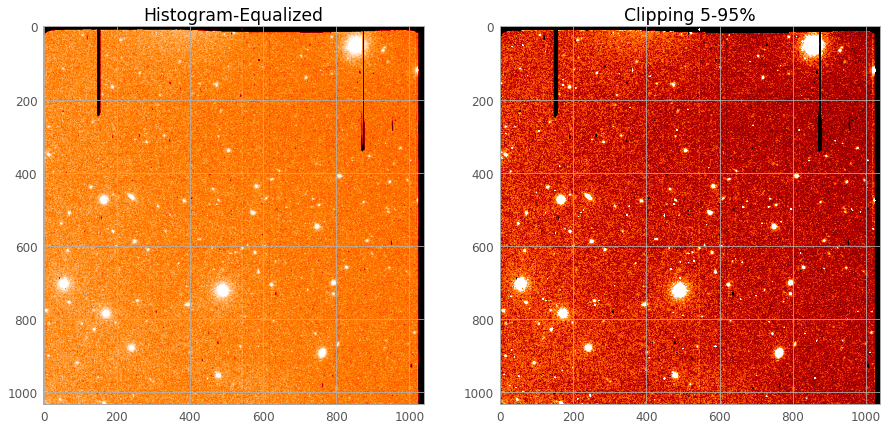

In [ ]:
# Histogram-Equalize photo
plt.subplot(1,2,1)
plt.imshow(exposure.equalize_hist(cal));
plt.title('Histogram-Equalized')

# Clip out outliers 
plt.subplot(1,2,2)
p5, p95 = np.percentile(cal, (5, 95))
plt.imshow(cal,vmin=p5,vmax=p95)
plt.title("Clipping 5-95%");

Text(0.5, 1.0, 'Gamma Ray Burst Image')

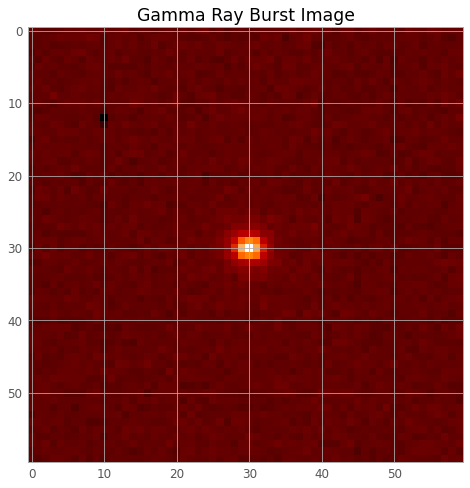

In [ ]:
# (X,Y) locations from ds9:
# GRB: (582,437)
# 141: (490,722)
# 184: (506,339)
# 179: (623,705)

# Show focus
x0,y0 = 582,437
zoom_im = cal[y0-30:y0+30,x0-30:x0+30] # remember x,y is opposite to row,col in python
plt.imshow(zoom_im)
plt.title('Gamma Ray Burst Image')

Text(0, 0.5, 'Pixel Value Intensity')

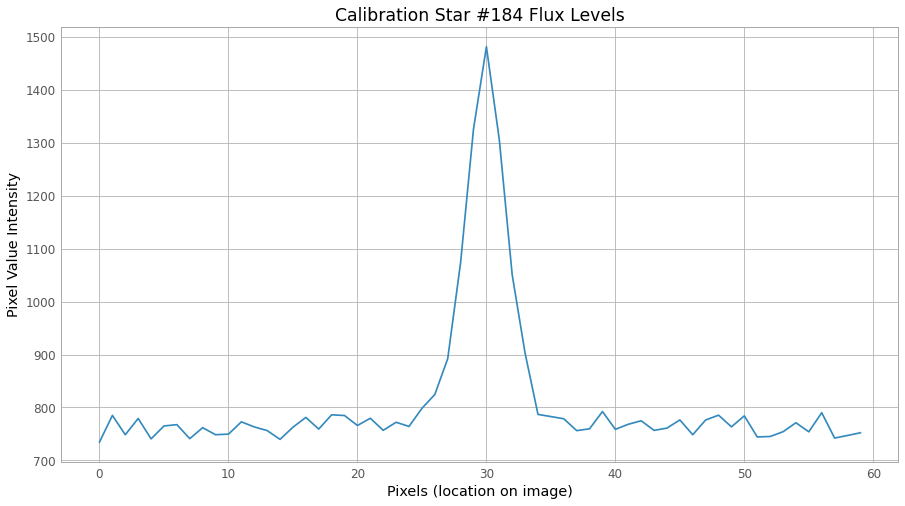

In [ ]:
plt.plot(zoom_im[30,:]) 
plt.title("Calibration Star #184 Flux Levels");
plt.xlabel('Pixels (location on image)')
plt.ylabel('Pixel Value Intensity')

#high sky background.

In [ ]:
# We can use photutils library to do some aperture photemery withot having to do everything. 
# Following the methods described in class.

from photutils import aperture_photometry
from photutils.datasets import make_100gaussians_image
from photutils import CircularAperture, CircularAnnulus,centroid_2dg
from astropy.visualization import simple_norm

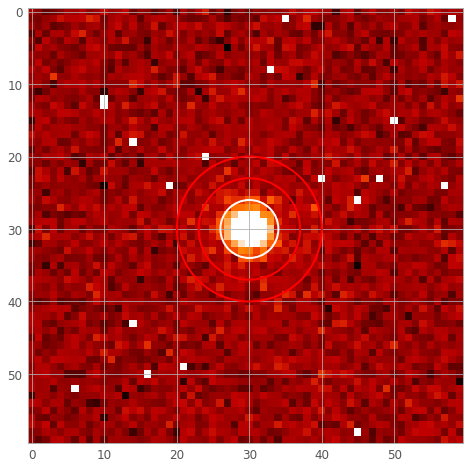

In [ ]:
# Apply annuli
positions = [(30,30)]
aperture = CircularAperture(positions, r=4)
annulus_aperture = CircularAnnulus(positions, r_in=7, r_out=10)

norm = simple_norm(zoom_im, 'sqrt', percent=99)
plt.imshow(zoom_im, norm=norm, interpolation='nearest')
aperture.plot(color='white', lw=2)
annulus_aperture.plot(color='red', lw=2)


In [ ]:
# Centering annuli using mean, median, std

from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(zoom_im, sigma=3.0)  
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(zoom_im - median) 
print(sources['xcentroid'][0],sources['ycentroid'][0])

30.079615184981545 30.462430743251023


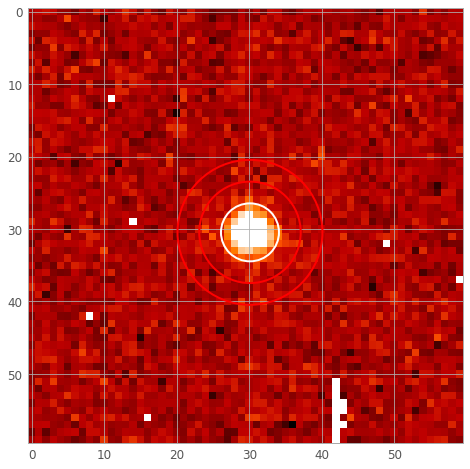

In [ ]:
positions = [sources['xcentroid'][0],sources['ycentroid'][0]]
aperture = CircularAperture(positions, r=4)
annulus_aperture = CircularAnnulus(positions, r_in=7, r_out=10)
plt.imshow(zoom_im, norm=norm, interpolation='nearest')
aperture.plot(color='white', lw=2)
annulus_aperture.plot(color='red', lw=2)


In [ ]:
# Displaying total counts and counts above background

apers=[aperture, annulus_aperture]
phot_table = aperture_photometry(zoom_im, apers)
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area # this is a surface brightness (ADU/pixel)
bkg_sum = bkg_mean * aperture.area # assumes surface brightness in our aperture is same as in annulus.
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
print("Total Counts in aperture: %9.2f   Mean Background/pix in Annulus: %9.2f"%(phot_table['aperture_sum_0'],bkg_mean))
print("Total Counts in aperture above Background: %9.2f  "%(final_sum))

Total Counts in aperture:  46905.48   Mean Background/pix in Annulus:    764.49
Total Counts in aperture above Background:   8478.26  


**GRB:**

Total Counts in aperture:  48045.54   
Mean Background/pix in Annulus:    767.53

Total Counts in aperture above Background:   9465.32 

**Calibration Star #141:**

Total Counts in aperture: 319824.95   
Mean Background/pix in Annulus:    935.46

Total Counts in aperture above Background: 272803.60

**Calibration Star #184:**

Total Counts in aperture:  42996.63   
Mean Background/pix in Annulus:    763.04

Total Counts in aperture above Background:   4641.96

**Calibration Star #179:**

Total Counts in aperture:  46905.48  
Mean Background/pix in Annulus:    764.49

Total Counts in aperture above Background:   8478.26


In [ ]:
# Noise Calculations 
# Use the range, compare fractional error

# Signal Noise (e-)
print('GRB Photon Noise: ', ((9465*4) / np.sqrt(9465*4))) 
print('141 Photon Noise: ', ((272804*4) / np.sqrt(272804*4)))
print('184 Photon Noise: ', ((4642*4) / np.sqrt(4642*4)))
print('179 Photon Noise: ', ((8478*4) / np.sqrt(8478*4)), '\n')

# SNR 
print('GRB Photon SNR: ', ((9465*4) / np.sqrt(48045*4))) 
print('141 Photon SNR: ', ((272804*4) / np.sqrt(319825*4)))
print('184 Photon SNR: ', ((4642*4) / np.sqrt(42997*4)))
print('179 Photon SNR: ', ((8478*4) / np.sqrt(46905*4)), '\n')
  
# Background Noise (e-)
print( 'GRB Background Noise: ', ((48045*4) / np.sqrt(48045*4)) )
print( '141 Background Noise: ', ((319825*4) / np.sqrt(319825*4)) )
print( '184 Background Noise: ', ((42997*4) / np.sqrt(42997*4)) )
print( '179 Background Noise: ', ((42997*4) / np.sqrt(42997*4)), '\n' )

# Flat Frame Error
print('Flat frame error: ', np.std(master_flat_norm), '\n')

# Read Noise
print('Given Read Noise: 10 e-')
print('Calculated Read Noise: ', 10*np.sqrt(np.pi*4**2))


GRB Photon Noise:  194.57646311925808
141 Photon Noise:  1044.6128469437851
184 Photon Noise:  136.26444877516658
179 Photon Noise:  184.1521110386737 

GRB Photon SNR:  86.36276038616023
141 Photon SNR:  964.7716324942548
184 Photon SNR:  44.77298548587446
179 Photon SNR:  78.29136008704192 

GRB Background Noise:  438.38339384607167
141 Background Noise:  1131.0614483749323
184 Background Noise:  414.71435952954414
179 Background Noise:  414.71435952954414 

Flat frame error:  0.05193608058232072 

Given Read Noise: 10 e-
Calculated Read Noise:  70.89815403622063


119.85407794480753

In [ ]:
# Raw Magnitudes:

# Using Magnitude formula with total counts in aperture above background
GRB_mag_raw = -2.5*np.log10(9465.32)
print('GRB Mag Without C: ',GRB_mag_raw)
mag_141_raw = -2.5*np.log10(272803.60)
print('141 Mag Without C: ',mag_141_raw)
mag_184_raw = -2.5*np.log10(4641.96)
print('184 Mag Without C: ',mag_184_raw)
mag_179_raw = -2.5*np.log10(8478.26)
print('179 Mag Without C: ',mag_179_raw)

GRB Mag Without C:  -9.94033825253374
141 Mag Without C:  -13.589625242763695
184 Mag Without C:  -9.166753484497224
179 Mag Without C:  -9.820766827004748


In [ ]:
# From Finder Chart: 
# Known magnitudes of calibration stars
mag_141 = 14.14
mag_184 = 18.42
mag_179 = 17.91

In [ ]:
# Calculating Zero Point:
# Ignoring Error on Finder Chart

# Individual C approximations
C_141 = mag_141 - mag_141_raw
print('C from 141 is ',C_141)
C_184 = mag_184 - mag_184_raw
print('C from 184 is ',C_184)
C_179 = mag_179 - mag_179_raw
print('C from 179 is ',C_179, '\n')

# Mean Value of C
arr = [C_141,C_184,C_179]
C_stdev = np.std(arr)
C_mean = np.mean(arr)
print('Mean Value of C: ',C_mean)
print('Standard Deviation of C: ',C_stdev)

# RMS Value of C
C_sq = (C_141**2 + C_184**2 + C_179**2) / 3
C_sq_m = np.mean(C_sq)
print('RMS Mean Value of C: ',np.sqrt(C_sq_m))

# Display Results
print('C = ', C_mean, '+/-', C_stdev, '\n' )
print('True Magnitude of GRB = ', GRB_mag_raw+C_mean, '+/-', C_stdev)

C from 141 is  27.729625242763696
C from 184 is  27.586753484497226
C from 179 is  27.73076682700475 

Mean Value of C:  27.682381851421894
Standard Deviation of C:  0.06762107277150396
RMS Mean Value of C:  27.682464441906447
C =  27.682381851421894 +/- 0.06762107277150396 

True Magnitude of GRB =  17.742043598888152 +/- 0.06762107277150396
